In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def gaussian_kernel(x, x0, tau):
    return np.exp(-np.sum((x - x0) ** 2) / (2 * tau ** 2))

In [ ]:
def compute_weights(X, x0, tau):
    m = X.shape[0]
    weights = np.zeros(m)
    for i in range(m):
        weights[i] = gaussian_kernel(X[i], x0, tau)
    return np.diag(weights)

In [ ]:
def locally_weighted_regression(X, y, x0, tau):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    x0_b = np.r_[1, x0]
    W = compute_weights(X, x0, tau)
    theta = np.linalg.inv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y)
    return x0_b @ theta

In [ ]:
def plot_lwr(X, y, tau):
    X_range = np.linspace(np.min(X), np.max(X), 300)
    y_pred = [locally_weighted_regression(X, y, np.array([x0]), tau) for x0 in X_range]

    plt.scatter(X, y, color='blue', label='Data points')
    plt.plot(X_range, y_pred, color='red', label='LWR fit')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title(f'Locally Weighted Regression (tau={tau})')
    plt.legend()
    plt.show()

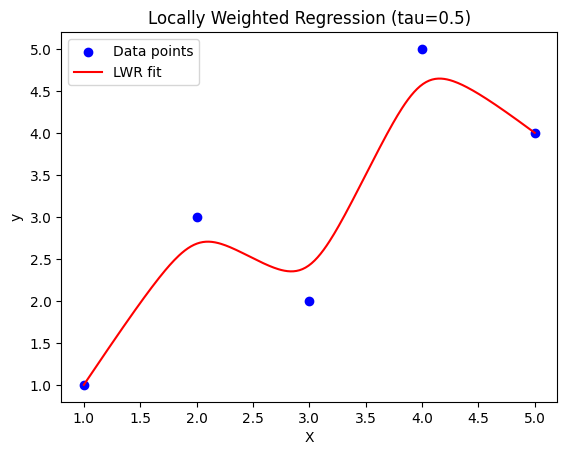

In [ ]:
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([1, 3, 2, 5, 4])
plot_lwr(X, y, tau=0.5)